In [ ]:
###########################################################################
###   make color_fig1.pdf and color_fig2.pdf with custom colormaps   ######
###########################################################################


In [1]:
############################################
############   Imports    ##################
############################################
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
############################################################
###### Standardize all figure text, font, size #############
############################################################
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
mpl.rc('xtick', labelsize=12) # standardize font size
mpl.rc('ytick', labelsize=12) # standarize font size

In [3]:
##############################################################
###   Online color picker generates array of hex colors.   ###
###   Paste hex colors here for FIG 1                      ###
##############################################################
hex_color_array = ["8e3b46","e1dd8f","ea9e8d","020122","788aa3"]; # array of N colors

## insert a # at the beginning of each hex string
for i in range(len(hex_color_array)):
    hex_color_array[i] = '#'+hex_color_array[i]

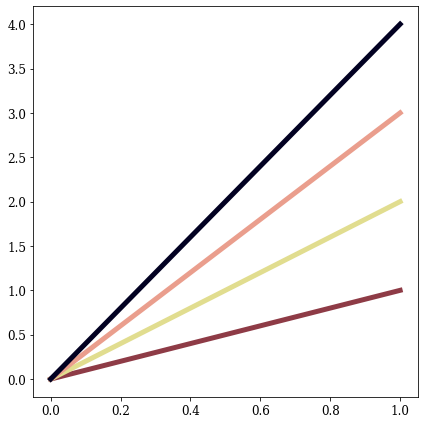

In [4]:
######################################
###### Make  color_fig1.pdf  #########
######################################

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax.plot([0,1],[0,1],color=hex_color_array[0],linewidth=5);  #<- set custom color
ax.plot([0,1],[0,2],color=hex_color_array[1],linewidth=5);  #<- set custom color
ax.plot([0,1],[0,3],color=hex_color_array[2],linewidth=5);  #<- set custom color
ax.plot([0,1],[0,4],color=hex_color_array[3],linewidth=5);  #<- set custom color

# save figure as pdf
fig.tight_layout()
fig.savefig('figures/color_fig1.pdf', format='pdf', dpi=400,bbox_inches='tight',transparent=True)

In [5]:
##############################################################
###   Online color picker generates array of hex colors.   ###
###   Paste hex colors here for FIG 2                      ###
##############################################################

hex_color_array =["432371","4C2A72","553172","5E3873","683F73","714674","7A4D74","835475","8C5B75",\
                  "956276","9F6976","A86F77","B17677","BA7D78","C38478","CC8B79","D59279","DF997A",\
                  "E8A07A","F1A77B","FAAE7B"];

## insert a # at the beginning of each hex string
for i in range(len(hex_color_array)):
    hex_color_array[i] = '#'+hex_color_array[i]


In [6]:
#####################################################################################
####### converter for hex color values -> rgb color values -> decimal values   ######
#####################################################################################
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

In [7]:
#################################################################
####### converter for hex color values -> decimal values   ######
#################################################################
dec_color_array = [];
for i in range(len(hex_color_array)):
    dec_color_array.append(rgb_to_dec(hex_to_rgb(hex_color_array[i])))

dec_color_array = np.asarray(dec_color_array)

##############################################################
####### create custom colormap from  dec_color_array  ########
##############################################################
custom_colormap = ListedColormap(dec_color_array)

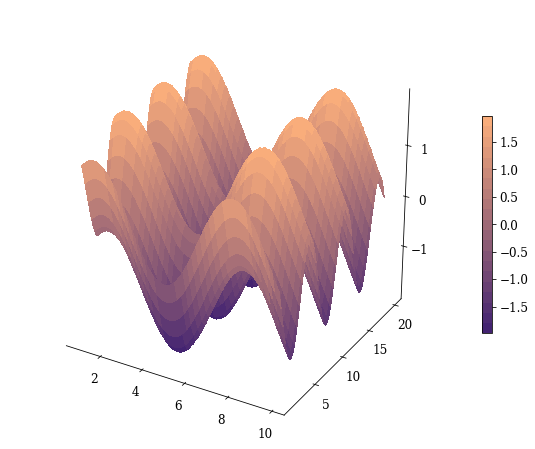

In [8]:
######################################
###### Make  color_fig2.pdf  #########
######################################

# Make data.
X = np.arange(1, 10, 0.1)
Y = np.arange(1, 20, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X) + np.cos(Y)

# Plot the surface.
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z,cmap=custom_colormap, #<- using custom colormap
                       linewidth=0, antialiased=False)
fig.colorbar(surf,shrink=0.5)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# set y and z ticks
ax.set_yticks(ticks=[5, 10, 15, 20]);
ax.set_zticks(ticks=[-1, 0, 1]);

# save figure as pdf
fig.savefig('figures/color_fig2.pdf', format='pdf', dpi=400,bbox_inches='tight',transparent=True)